### Use-case: An HR company has hired you as a Data Scientist. Your role is to create a model that can predict the salary of the employee based on his/her experience

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
data = pd.read_csv('Salary_Data.csv')

In [59]:
#Check for missing data
#Check the type of data you are dealing with
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [60]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [61]:
#Since my label(salary) is numeric, we will go for Regression
#Check the correlation between label and feature
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


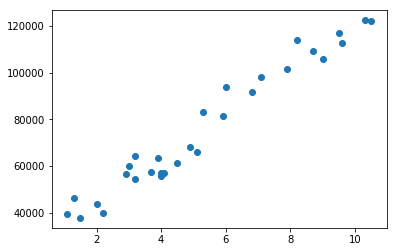

In [62]:
#Y-axis is always label when it comes to check linear relationship using scatter plot
plt.scatter(data.YearsExperience,data.Salary)

In [63]:
#Seperate our data with features and label
#Since we are going to implement linear regression using sklearn, your features and label must be a 2d numpy array
feature = data.iloc[:,[0]].values
label = data.iloc[:,[1]].values

In [64]:
#Create a training and testing dataset   ----> 80% training, 20% testing
#X_train,y_train together forms training set ----> Training the model
#X_test,y_test together forms testing set -------> Checking the quality of the model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(feature,
                                                label,
                                                test_size=0.2,
                                                random_state= 30)

In [65]:
#Implement LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train) #fit will create the model----> calc intercept and coeff!!

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
#Check the quality of the model
#We will depend on accuracy score
#for calculating the accuracy score, sklearn provides score()
print("Training data Score is (Known Data) ", model.score(X_train,y_train))
print("Testing data Score is (Unknown Data) ", model.score(X_test,y_test))


Training data Score is (Known Data)  0.9400496694274888
Testing data Score is (Unknown Data)  0.9944092048209744


In [67]:
# Rule is applicable for all ML Algos
#Our expectation is testing score > training score 
#If the above is achieved, we get a GENERALIZED Model.
# We must ensure whatever model you deploy, the model must be a Generalized model.

In [68]:
#Since currently the model is not generalized we need to do some tuning
#What are the steps that you can perform
# 1. Eliminate those features who has less correlation
# 2. Change the sampling style
# 3. Increase the data

In [69]:
#Technique to get the best model based on random_state
#Generalized Model with accuracy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
for i in range(1,31):
   
    X_train,X_test,y_train,y_test = train_test_split(feature,
                                                label,
                                                test_size=0.2,
                                                random_state= i)
    model = LinearRegression()
    model.fit(X_train,y_train)
    training_score = model.score(X_train,y_train)
    testing_score = model.score(X_test,y_test)
    if testing_score > training_score:
        print("Training Score is {} Testing Score is {} in Random state {}".format(training_score,testing_score,i))

Training Score is 0.9545249190394052 Testing Score is 0.9695039421049821 in Random state 3
Training Score is 0.9528197369259258 Testing Score is 0.9631182154839475 in Random state 8
Training Score is 0.9494673013344644 Testing Score is 0.9816423482070255 in Random state 10
Training Score is 0.9527636176933665 Testing Score is 0.9606215790278543 in Random state 14
Training Score is 0.9460054870434312 Testing Score is 0.9835849730044817 in Random state 26
Training Score is 0.9527636606684406 Testing Score is 0.9636425773684422 in Random state 27
Training Score is 0.9400496694274888 Testing Score is 0.9944092048209744 in Random state 30


In [73]:
#Do Predictions
yearExperience = np.array([[float(input("Enter years of Experience: "))]])
print("The salary for {} is {} ".format(yearExperience,model.predict(yearExperience)))

Enter years of Experience: 3
The salary for [[3.]] is [[54009.54830747]] 


In [71]:
#Lets generate the equation
#Slope of Yexp and intercept
model.coef_

array([[9481.03756369]])

In [72]:
model.intercept_

array([25566.43561641])

In [ ]:
#Salary = 25566.43561641 + (9481.03756369 * YearsExperience)

In [ ]:
#Since my model is giving 99% accuracy, we can deploy the same to production

In [75]:
#Deployment ----> model (Store this model in a file so that I can load the model in RAM
#and perform predictions whenever I need.)
import pickle 
pickle.dump(model, open('HRSalaryPredictor.model' , 'wb'))